<a href="https://colab.research.google.com/github/ZahraShahlaie/Graph-Spectral-Clustering-and-Partial-Differential-Equations/blob/main/Wave_and_Heat_Equation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Karate Club**



## useful sites :
Fast  Fourier Transform in numpy :

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.htm

https://numpy.org/doc/stable/reference/routines.fft.html

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

sklearn.cluster.SpectralClustering:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

https://carpentries-incubator.github.io/machine-learning-novice-sklearn/04-clustering/index.html

Clustering of unlabeled data can be performed with the module sklearn.cluster:

https://scikit-learn.org/stable/modules/clustering.html

Comparing different clustering algorithms on toy datasets:

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-

sklearn.cluster.KMeans:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Examples using sklearn.cluster.KMeans:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#examples-using-sklearn-cluster-kmeans

This is the class and dataset and function reference of scikit-learn:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

sklearn.mixture: Gaussian Mixture Models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.data

scipy.signal.find_peaks:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

numpy.stack:

https://numpy.org/doc/stable/reference/generated/numpy.stack.html

https://networkx.org/documentation/stable/tutorial.html

https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering



In [ ]:
from networkx.linalg.graphmatrix import adjacency_matrix
from sklearn.cluster import spectral_clustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import zero_one_loss
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.fftpack import fft
import networkx as nx
import scipy.signal
import numpy as np
import scipy as sp


Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


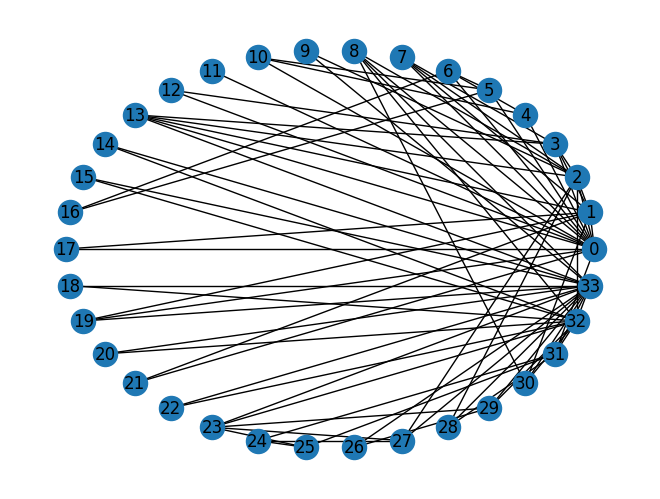

In [ ]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

nx.draw_circular(G, with_labels=True)
plt.show()

In [ ]:
# create the adjacency matrix of the graph
adj_matrix =nx.adjacency_matrix(G)

# Convert the adjacency matrix to a NumPy array
adj_array = np.array(adj_matrix.todense())

In [ ]:
real_labels = [0 if G.nodes[n]['club'] == 'Mr. Hi' else 1 for n in G.nodes()]
print(real_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


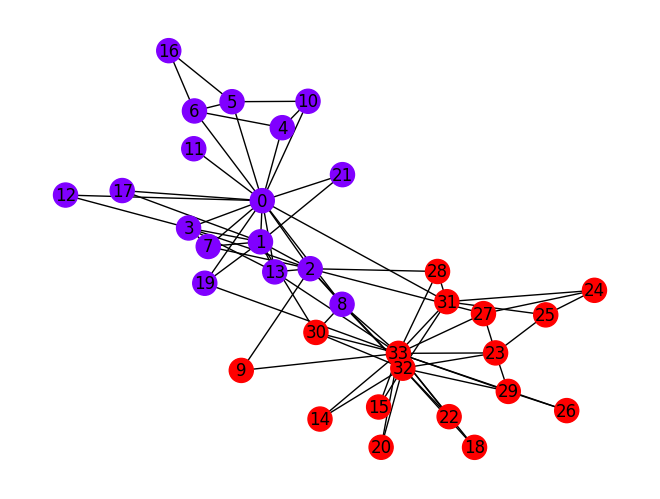

In [ ]:
# The initial position of the nodes
pos = nx.spring_layout(G,seed=40)

# Graph display with coloring based on clusters
nx.draw(G, pos, with_labels=True, node_color=real_labels, cmap=plt.cm.rainbow)
plt.show()

# Implementation of the k means algorithm

kmeans_labels =  [1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


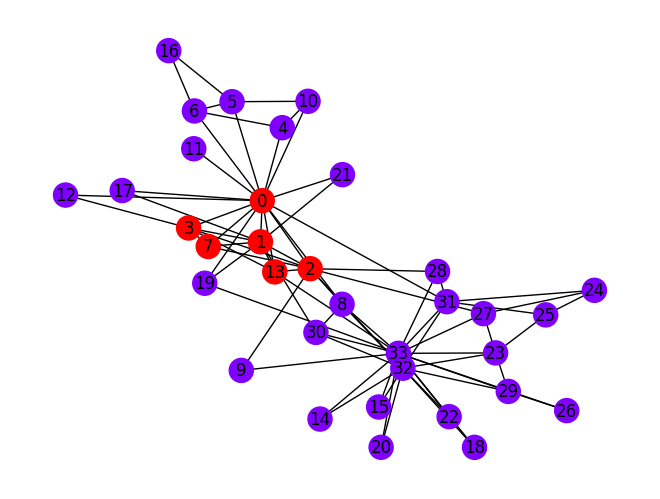

In [ ]:
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(adj_array)
print("kmeans_labels = ",kmeans_labels)


# Graph display with coloring based on clusters
nx.draw(G, pos, with_labels=True, node_color=kmeans_labels, cmap=plt.cm.rainbow)
plt.show()

In [ ]:
kmeans_labels

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
error_count_kmeans = zero_one_loss(real_labels, kmeans_labels, normalize=False)
print(f"Number of Misclassifications: {error_count_kmeans}")

Number of Misclassifications: 23


# Implementation of the spectral clustering algorithm

spectral_labels =  [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


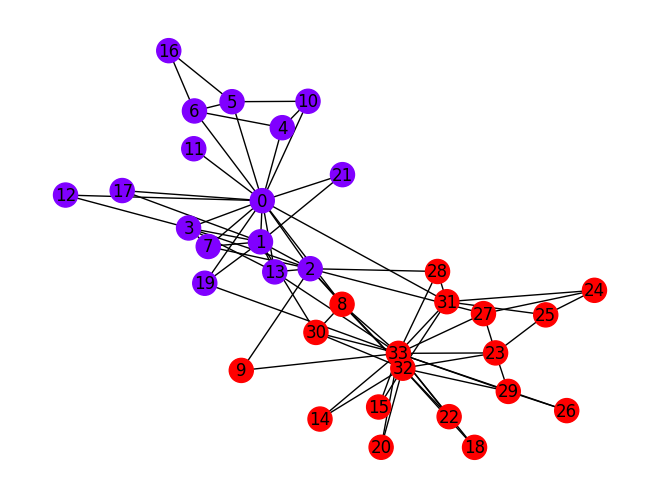

In [ ]:
# Number of clusters
num_clusters = 2
spectral = SpectralClustering(n_clusters=num_clusters,affinity="precomputed", random_state=42)
spectral_labels = spectral.fit_predict(adj_array)
print("spectral_labels = ",spectral_labels)
# The initial position of the nodes


# Graph display with coloring based on clusters
nx.draw(G, pos, with_labels=True, node_color=spectral_labels, cmap=plt.cm.rainbow)
plt.show()

In [ ]:
spectral_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
error_count_kmeans = zero_one_loss(real_labels, spectral_labels, normalize=False)
print(f"Number of Misclassifications: {error_count_kmeans}")

Number of Misclassifications: 1


# create degree matrix  , laplacian matrix  , normalized laplacian



In [ ]:
# Define degree_matrix
degree_matrix = np.diag(np.sum(adj_array, axis=1))

print(degree_matrix)

[[42  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 48]]


In [ ]:
# Define laplacian_matrix

laplacian_matrix =  degree_matrix - adj_array

print(laplacian_matrix)

[[42 -4 -5 ... -2  0  0]
 [-4 29 -6 ...  0  0  0]
 [-5 -6 33 ...  0 -2  0]
 ...
 [-2  0  0 ... 21 -4 -4]
 [ 0  0 -2 ... -4 38 -5]
 [ 0  0  0 ... -4 -5 48]]


In [ ]:
# Define normalized_laplacian
normalized_laplacian =  np.linalg.inv(degree_matrix) @ laplacian_matrix

print(normalized_laplacian)

[[ 1.         -0.0952381  -0.11904762 ... -0.04761905  0.
   0.        ]
 [-0.13793103  1.         -0.20689655 ...  0.          0.
   0.        ]
 [-0.15151515 -0.18181818  1.         ...  0.         -0.06060606
   0.        ]
 ...
 [-0.0952381   0.          0.         ...  1.         -0.19047619
  -0.19047619]
 [ 0.          0.         -0.05263158 ... -0.10526316  1.
  -0.13157895]
 [ 0.          0.          0.         ... -0.08333333 -0.10416667
   1.        ]]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigsh


# Calculate the first k eigenvectors
num_eigenvectors = 2
eigenvalues, eigenvectors = eigsh(normalized_laplacian, k=num_eigenvectors, which='SM')  # SM: Smallest Magnitude




In [ ]:
eigenvalues

array([-0.02587982,  0.07200248])

In [ ]:
eigenvectors

array([[-0.17254053, -0.15508414],
       [-0.24123092, -0.02905275],
       [-0.17176742, -0.04811432],
       [-0.26873536, -0.05423838],
       [-0.13183362, -0.33641085],
       [-0.13257876, -0.35849578],
       [-0.1407432 , -0.3267884 ],
       [-0.13216327, -0.0754766 ],
       [-0.19864082,  0.01875535],
       [-0.25088788,  0.08259395],
       [-0.12917097, -0.29714427],
       [-0.23095078, -0.16537131],
       [-0.08501511, -0.12880706],
       [-0.18519854, -0.05234643],
       [-0.10660877,  0.13958536],
       [-0.14008105,  0.14748452],
       [-0.16538363, -0.35869214],
       [-0.12782642, -0.0983331 ],
       [-0.21258995,  0.13014123],
       [-0.14413732, -0.0338726 ],
       [-0.1352785 ,  0.10931149],
       [-0.13742522, -0.08946719],
       [-0.14662135,  0.14841344],
       [-0.16920992,  0.16155008],
       [-0.1171283 ,  0.14771825],
       [-0.09652309,  0.12458381],
       [-0.10012889,  0.12397011],
       [-0.22463211,  0.20353646],
       [-0.10373557,

# real_label_second_eigenvectors
In the following, we use them to compare with the predicted values from wave and heat equation




In [ ]:
second_eigenvectors_labels = []
for i in range(eigenvectors[:,1].size):
  if eigenvectors[:,1][i]>0:
    second_eigenvectors_labels.append(1)
  else:
    second_eigenvectors_labels.append(0)

In [ ]:
print(second_eigenvectors_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
error_count_kmeans = zero_one_loss(real_labels, second_eigenvectors_labels, normalize=False)
print(f"Number of Misclassifications: {error_count_kmeans}")

Number of Misclassifications: 1


In [ ]:
error_count_kmeans = zero_one_loss(spectral_labels, second_eigenvectors_labels, normalize=False)
print(f"Number of Misclassifications: {error_count_kmeans}")

Number of Misclassifications: 0


# Wave Equation Clustering

In [ ]:
# Define variables
c=0.1
k = 2
k_ = int(np.log2(k))
assert k_ == np.log2(k), "k must be a power of 2"
T_max=10000

In [ ]:
n ,_ =adj_array.shape

In [ ]:
wave = np.zeros((n, T_max + 1))

wave[:, 0] = np.array([0.84458809, 0.54393494, 0.80514627, 0.583861  , 0.66653963,
0.28204532, 0.6035456 , 0.56417424, 0.51591055, 0.91207838,
0.95711191, 0.27129955, 0.69525386, 0.20003808, 0.11513604,
0.13653608, 0.48415541, 0.12470981, 0.11469276, 0.26714951,
0.10632669, 0.98991969, 0.06345695, 0.27693362, 0.24140077,
0.01220973, 0.59693689, 0.90318818, 0.81201379, 0.58406251,
0.27080942, 0.29029135, 0.21837795, 0.75506102])

#wave[:, 0] = np.random.uniform(size=n)
wave[:, 1] = wave[:, 0]

In [ ]:
for i in range(2, T_max + 1):
        wave[:, i] = 2 * wave[:, i-1] - wave[:, i-2] - (c**2) * (normalized_laplacian @ wave[:, i-1])

In [ ]:
wave_fft = np.fft.rfft(wave[:, 1:], axis=1)

In [ ]:
def cos_coeffs(fourier_coeffs):
    '''
    Given a sequence of two-sided fourier coefficients (negative freqs, positive freqs) return the corresponding two-sided cos coeffs
    '''
    return np.real(fourier_coeffs)

In [ ]:
wave_cos_coeffs = cos_coeffs(wave_fft)

peaks =  [ 53  79  96 104 120 124 128 134 136 140 143 146 151 168 175 182 187 189
 191 196 201 203 207 224]
first peak in first node : ( 53 , 336.05359101116863 )


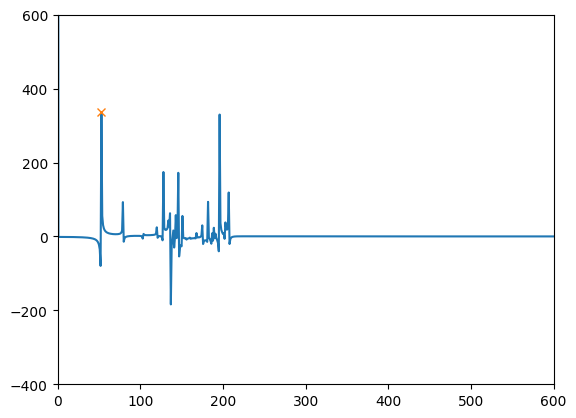

In [ ]:
#show first peak in first node

x = wave_cos_coeffs[0,:]
peaks, _ = find_peaks(x, height=0)
print("peaks = ",peaks)
plt.plot(x)
print("first peak in first node : (",peaks[0],",", x[peaks[0]],")")
plt.plot(peaks[0], x[peaks[0]], "x")
plt.xlim(0,600)
plt.ylim(-400,600)
plt.show()

In [ ]:

freq_peaks = [scipy.signal.find_peaks(wave_cos_coeffs[idx, 1:])[0] for idx in range(n)]
#freq_peaks = [scipy.signal.find_peaks(np.abs(wave_cos_coeffs[idx, 1:]))[0] for idx in range(n)]

In [ ]:
truncated_freq_peaks = np.stack([f[:k_] for f in freq_peaks])

In [ ]:
binary = np.zeros(shape = (n, k_))
cluster_num = np.zeros(shape = (n))

for i in range(n):
  for j, freq_peak in enumerate(truncated_freq_peaks[i]):
           if wave_cos_coeffs[i][freq_peak] > 0:
                binary[i][j] =1
                cluster_num[i] += 2**j

           else:
                binary[i][j] =0
           print(wave_cos_coeffs[i][freq_peak])


-79.74562872984993
-45.08076390798252
-22.15095417065953
-55.93201615692564
-157.46631587444756
-176.36192095560682
-175.33668464982372
-50.837847051488325
12.108098870161829
23.01207457160991
-169.42687992445988
-85.36316941002768
-66.87471149641893
-33.68692000571528
35.038825882694134
35.129386287437704
-197.67888979651673
-73.553061533615
34.811075756732336
-36.495053442366135
35.06794297166685
-57.34731764959749
34.306903335676054
38.60761890262535
32.525100839299085
41.7655993655803
49.23854804599753
29.06372602430634
24.341712783411985
43.60572138147816
18.149763253300883
29.71856477593758
33.72115754251849
31.586565963197167


In [ ]:

print("predicted_label_from_wave = ",cluster_num)


predicted_label_from_wave =  [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
error_count_wave = zero_one_loss(spectral_labels, cluster_num, normalize=False)
print(f"Number of Misclassifications: {error_count_wave}")

Number of Misclassifications: 0


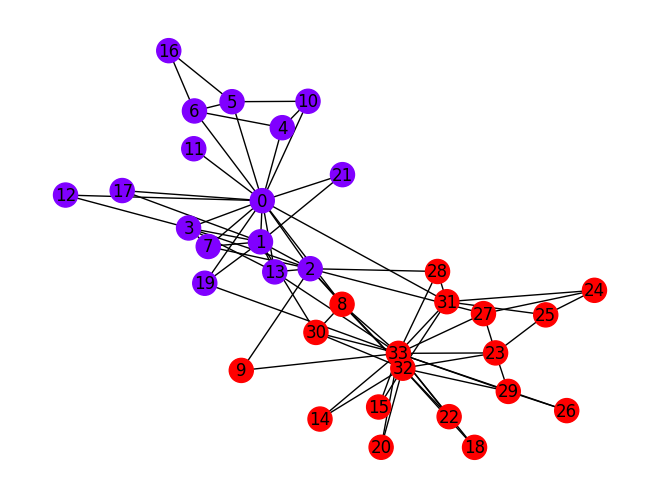

In [ ]:

labels_wave = cluster_num

nx.draw(G, pos, with_labels=True, node_color=labels_wave, cmap=plt.cm.rainbow)
plt.show()


# Heat Equation Clustering

In [ ]:
n ,_ =adj_array.shape
dx = 1/n
dt = 0.01 * (1/2) * (dx**2) # Using CFL Conditions
T_max = 100000


In [ ]:
evolution = np.zeros((n, T_max+1))

evolution[:, 0] = np.random.uniform(size=(n,)) + np.sin(0.05 * np.arange(n))

for i in range(1, T_max+1):
    evolution[:, i:i+1] = evolution[:, i-1:i] - (dt / (dx)**2) * laplacian_matrix @ evolution[:, i-1:i]

# Show Eigenvectors of Graph Laplacian

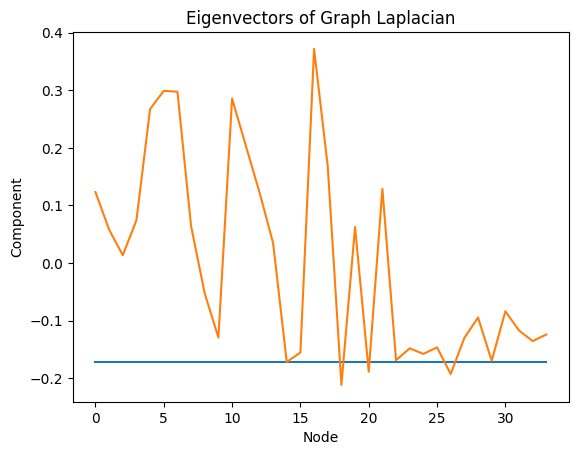

In [ ]:
evals, evecs = np.linalg.eigh(laplacian_matrix)
plt.title("Eigenvectors of Graph Laplacian")
plt.xlabel("Node")
plt.ylabel("Component")
plt.plot(evecs[:, :2])
plt.show()

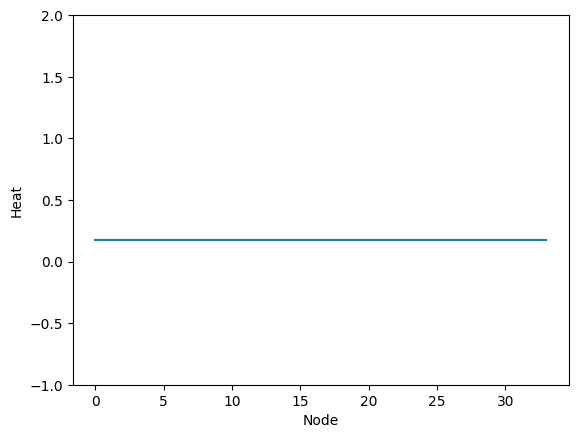

In [ ]:
i=100000
sig = evolution[:, i]
sig /= np.linalg.norm(sig)
plt.plot(sig)
#plt.title("Heat Diffusion on Line Graph")
plt.xlabel("Node")
plt.ylabel("Heat")
plt.ylim((-1, 2))
plt.show()

predicted_label_from_centeredHeat : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


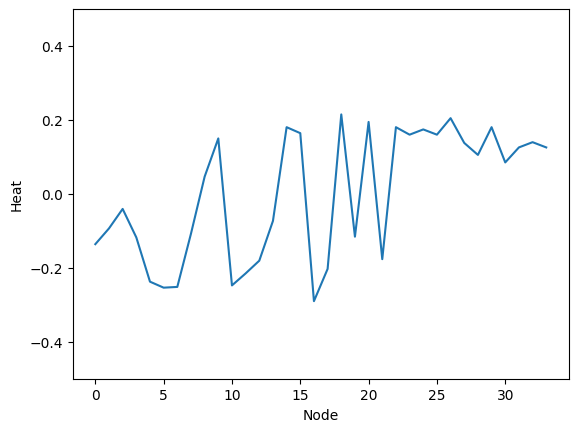

In [ ]:
i = 100000
predicted_label_centeredHeat = []
sig = evolution[:, i] - np.mean(evolution[:, i])
sig /= np.linalg.norm(sig)
plt.plot(sig)

for i in range(sig.size):
  if sig[i]>0:
    predicted_label_centeredHeat.append(1)
  else:
    predicted_label_centeredHeat.append(0)

print("predicted_label_from_centeredHeat :",predicted_label_centeredHeat)
#plt.title("Centered Heat Diffusion on Disconnected Line Graph")
plt.xlabel("Node")
plt.ylabel("Heat")
plt.ylim((-0.5, 0.5))
plt.show()

In [ ]:
error_count_wave = zero_one_loss(spectral_labels, predicted_label_centeredHeat, normalize=False)
print(f"Number of Misclassifications: {error_count_wave}")

Number of Misclassifications: 0


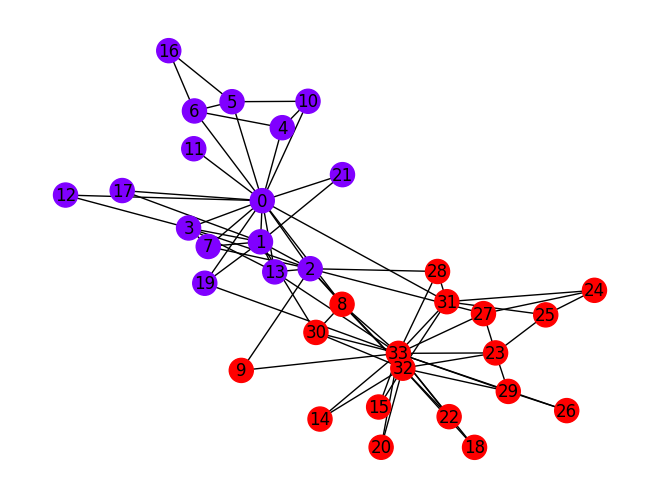

In [ ]:

nx.draw(G, pos, with_labels=True, node_color=predicted_label_centeredHeat, cmap=plt.cm.rainbow)
plt.show()